Matplotlib is building the font cache; this may take a moment.


=== My First Volatility Model ===

--- STEP 1: Creating a time series with changing volatility ---
✅ Created 1000 days of synthetic data.

--- STEP 2: Visualizing the data ---
... Generating Returns Plot ...


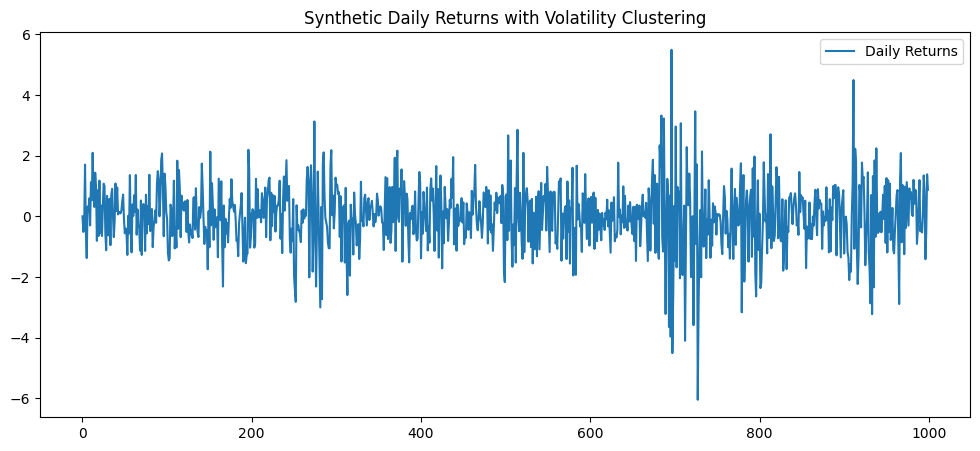

... Generating Squared Returns Plot ...


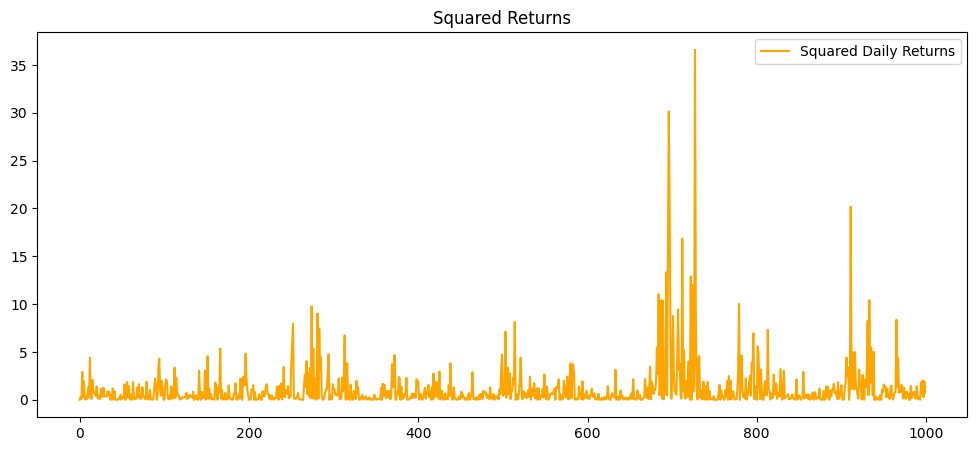


--- STEP 3: Building a Simple Volatility Model (EWMA) ---
I'll use an Exponentially Weighted Moving Average (EWMA).
✅ Simple volatility model created.

--- STEP 4: Comparing Our Model to Reality ---
... Generating Comparison Plot ...


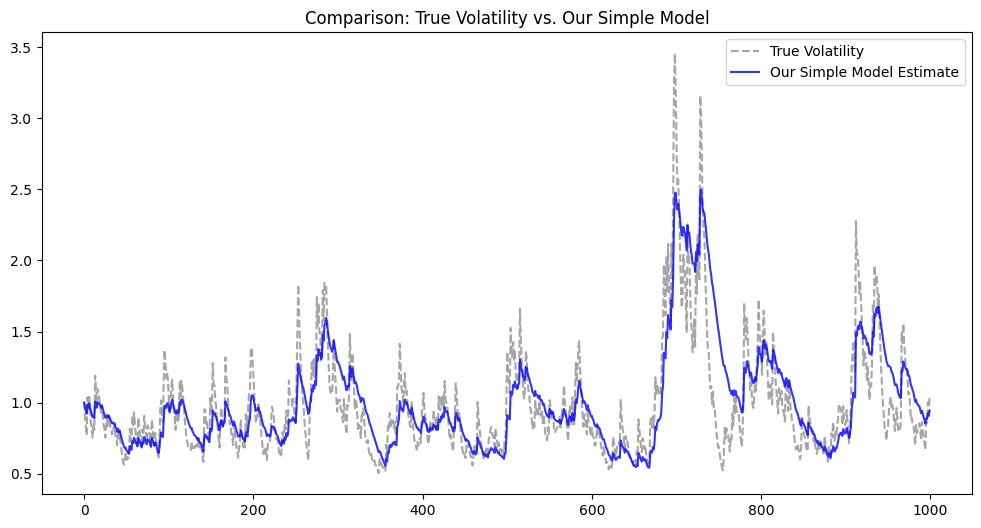


... Additional Analysis ...
The average difference between our model and reality was: 0.1524
... Generating Model Error Plot ...


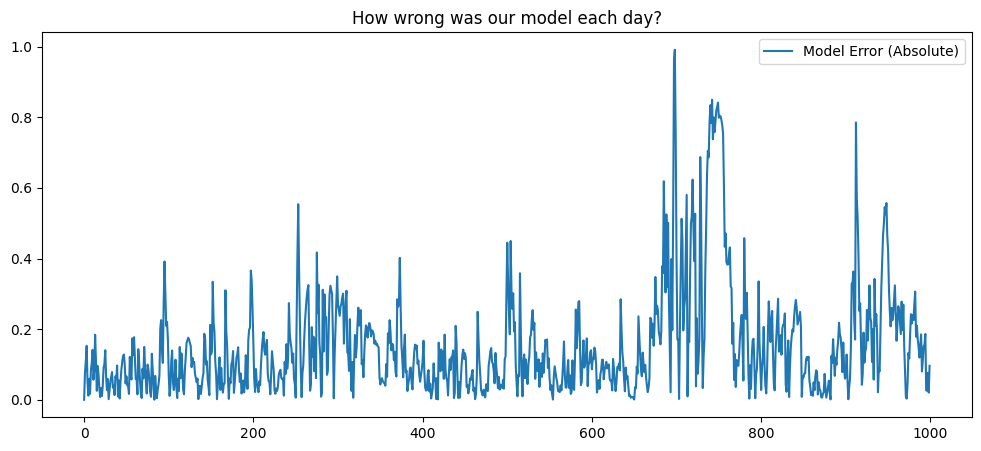


--- STEP 5: Making a Forecast ---
✅ Forecasted volatility for the next 30 days.
... Generating Forecast Plot ...


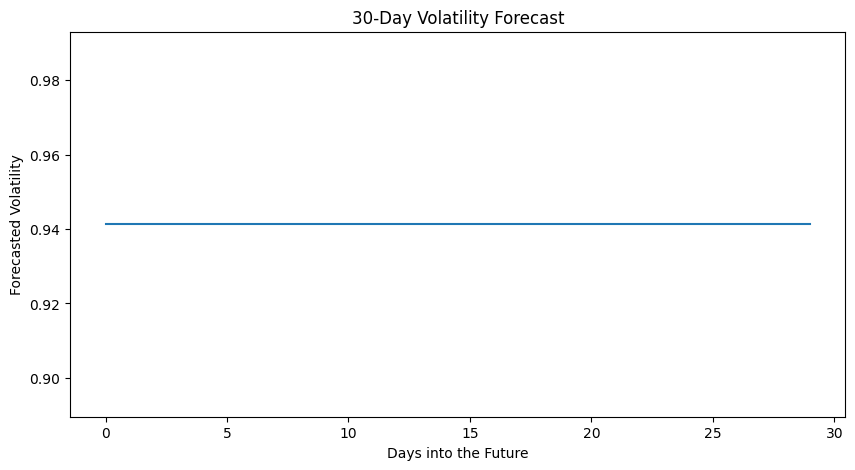


--- Project Complete ---
The forecast shows volatility slowly returning to a long-term average.


In [1]:
# My GARCH Volatility Model - V2 with more exploration

# --- Imports and Setup ---
import numpy as np
import matplotlib.pyplot as plt
import math
import random

print("=== My First Volatility Model ===")

# ================================================
# STEP 1: Make up some data with volatility clustering
# ================================================
print("\n--- STEP 1: Creating a time series with changing volatility ---")

# set the seed so our random numbers are the same each time
random.seed(101)
np.random.seed(101)

# number of days to simulate
n_days = 1000

# GARCH parameters to create the data
# these are the 'true' parameters for our fake data
omega = 0.05  # baseline variance
alpha = 0.2   # how much last period's shock matters
beta = 0.75   # how much last period's volatility matters
# NOTE TO SELF: alpha + beta must be < 1 or the model might explode. 0.2 + 0.75 = 0.95, so that's ok.

# lists to store our results
true_variances = []
list_of_returns = []

# set the starting variance
initial_variance = omega / (1 - alpha - beta)
true_variances.append(initial_variance)
list_of_returns.append(0) # start with a zero return

# loop for each day to generate the next return
for i in range(1, n_days):
    last_variance = true_variances[-1]
    last_return_sq = list_of_returns[-1]**2
    current_variance = omega + alpha * last_return_sq + beta * last_variance
    current_volatility = math.sqrt(current_variance)
    random_shock = random.gauss(0, 1)
    current_return = current_volatility * random_shock
    true_variances.append(current_variance)
    list_of_returns.append(current_return)

print(f"✅ Created {n_days} days of synthetic data.")


# ================================================
# STEP 2: Look at the data we made
# ================================================
print("\n--- STEP 2: Visualizing the data ---")

# Plot the returns
print("... Generating Returns Plot ...")
plt.figure(figsize=(12, 5))
plt.plot(list_of_returns, label='Daily Returns')
plt.title('Synthetic Daily Returns with Volatility Clustering')
plt.legend()
plt.show()
# NOTE TO SELF: the plot looks spiky, just like the examples in the lecture notes. Big spikes are clustered together.

# --- NEW VISUALIZATION ---
# Sometimes looking at squared returns can make the clusters easier to see
print("... Generating Squared Returns Plot ...")
squared_returns = [r**2 for r in list_of_returns]
plt.figure(figsize=(12, 5))
plt.plot(squared_returns, label='Squared Daily Returns', color='orange')
plt.title('Squared Returns')
plt.legend()
plt.show()

# ================================================
# STEP 3: Build a Simple Model to Estimate Volatility
# ================================================
print("\n--- STEP 3: Building a Simple Volatility Model (EWMA) ---")
print("I'll use an Exponentially Weighted Moving Average (EWMA).")

# This is a common value for the EWMA lambda (decay factor)
lambda_decay = 0.94
# todo: try changing this lambda value later to see what happens. Maybe 0.9 or 0.97?

modelled_variances = []
modelled_variances.append(true_variances[0]) # Start with the true variance

for i in range(1, n_days):
    last_model_var = modelled_variances[-1]
    last_return_sq = list_of_returns[i-1]**2
    next_variance = lambda_decay * last_model_var + (1 - lambda_decay) * last_return_sq
    modelled_variances.append(next_variance)

print("✅ Simple volatility model created.")

# ================================================
# STEP 4: Compare our model to the real volatility
# ================================================
print("\n--- STEP 4: Comparing Our Model to Reality ---")

# convert all variances to volatility for plotting
true_volatility = [math.sqrt(v) for v in true_variances]
modelled_volatility = [math.sqrt(v) for v in modelled_variances]

print("... Generating Comparison Plot ...")
plt.figure(figsize=(12, 6))
plt.plot(true_volatility, label='True Volatility', color='gray', alpha=0.7, linestyle='--')
plt.plot(modelled_volatility, label='Our Simple Model Estimate', color='blue', alpha=0.8)
plt.title('Comparison: True Volatility vs. Our Simple Model')
plt.legend()
plt.show()

# --- NEW ANALYSIS ---
# Let's see how wrong our model was on average
print("\n... Additional Analysis ...")
errors = [abs(true_volatility[i] - modelled_volatility[i]) for i in range(n_days)]
avg_error = np.mean(errors)
print(f"The average difference between our model and reality was: {avg_error:.4f}")

# Plot the errors
print("... Generating Model Error Plot ...")
plt.figure(figsize=(12, 5))
plt.plot(errors, label='Model Error (Absolute)')
plt.title('How wrong was our model each day?')
plt.legend()
plt.show()

# ================================================
# STEP 5: Make a simple forecast
# ================================================
print("\n--- STEP 5: Making a Forecast ---")

forecast_days = 30
# get the last known values from our data
last_known_variance = modelled_variances[-1]
last_known_return_sq = list_of_returns[-1]**2

# list to hold our forecast
forecasted_variance = []

# loop to create the forecast
for i in range(forecast_days):
    # The forecast formula is a bit different because we don't know the future returns
    # We assume the future return will be equal to the variance, which is a GARCH property
    next_variance = lambda_decay * last_known_variance + (1 - lambda_decay) * last_known_variance
    forecasted_variance.append(next_variance)
    # update the last known variance for the next loop
    last_known_variance = next_variance

forecasted_volatility = [math.sqrt(v) for v in forecasted_variance]
print(f"✅ Forecasted volatility for the next {forecast_days} days.")

print("... Generating Forecast Plot ...")
plt.figure(figsize=(10, 5))
plt.plot(forecasted_volatility)
plt.title('30-Day Volatility Forecast')
plt.xlabel('Days into the Future')
plt.ylabel('Forecasted Volatility')
plt.show()

print("\n--- Project Complete ---")
print("The forecast shows volatility slowly returning to a long-term average.")